In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def read_epw(file,year=None,alias=False):
    """
    Read EPW file 
    
    Arguments:
    ----------
    file -- path location of EPW file
    year -- None default to leave intact the year or change if desired. It raises a warning.
    alias -- False default, True to change to To, Ig, Ib, Ws, RH, ...
    
    """
  
    names = ['Year',
               'Month',
               'Day',
               'Hour',
               'Minute',
               'Data Source and Uncertainty Flags',
               'Dry Bulb Temperature',
               'Dew Point Temperature',
               'Relative Humidity',
               'Atmospheric Station Pressure',
               'Extraterrestrial Horizontal Radiation',
               'Extraterrestrial Direct Normal Radiation',
               'Horizontal Infrared Radiation Intensity',
               'Global Horizontal Radiation',
               'Direct Normal Radiation',
               'Diffuse Horizontal Radiation',
               'Global Horizontal Illuminance',
               'Direct Normal Illuminance',
               'Diffuse Horizontal Illuminance',
               'Zenith Luminance',
               'Wind Direction',
               'Wind Speed',
               'Total Sky Cover',
               'Opaque Sky Cover',
               'Visibility',
               'Ceiling Height',
               'Present Weather Observation',
               'Present Weather Codes','Precipitable Water','Aerosol Optical Depth','Snow Depth','Days Since Last Snowfall',
               'Albedo','Liquid Precipitation Depth','Liquid Precipitation Quantity']
    
    rename = {'Dry Bulb Temperature'        :'To',
              'Relative Humidity'           :'RH',
              'Atmospheric Station Pressure':'P' ,
              'Global Horizontal Radiation' :'Ig',
              'Direct Normal Radiation'     :'Ib',
              'Diffuse Horizontal Radiation':'Id',
              'Wind Direction'              :'Wd',
              'Wind Speed'                  :'Ws'}
    data = pd.read_csv(file,skiprows=8,header=None,names=names,usecols=range(35))
    #data.Minute = 0
    data.loc[data.Hour==24,['Hour']] = [00.]
    #data.loc[data.Year==2019,['Year']] = [2018]
    if year != None:
        data.Year = year
        warnings.warn("Year has been changed, be carefull")
    data['tiempo'] = data.Year.astype('str') + '-' + data.Month.astype('str')  + '-' + data.Day.astype('str') + ' ' + data.Hour.astype('str') + ':' + data.Minute.astype('str') 
    data.tiempo = pd.to_datetime(data.tiempo,format='%Y-%m-%d %H:%M')
    data.set_index('tiempo',inplace=True)
    del data['Year']
    del data['Month']
    del data['Day']
    del data['Hour']
    del data['Minute']
    if alias:
        data.rename(columns=rename,inplace=True)
    return data


In [13]:
f = '../data/Tsa_Temixco_enero_este_0.3_eps.epw'

In [14]:
epw = read_epw(f)

In [15]:
nombres=np.loadtxt('../data/Datos_Prueba_2018-02-19_16-45 (1).txt',dtype='U',max_rows=1,skiprows=2,delimiter='\t')
nombres[0]='fecha'
nombres[1]='hora'
nombres[3]='Ti'
nombres[6]='Tobj'
nombres[7]='To'
nombres[5]='Tg'
nombres[8]='Tsi_SC'
nombres[9]='Tso_SC'
LES=pd.read_csv('../data/Datos_Prueba_2018-02-19_16-45 (1).txt',names=nombres,sep='\t',skiprows=3)
LES.hora = LES.hora.str.replace('p. m.','PM',regex=True)
LES.hora = LES.hora.str.replace('a. m.','AM',regex=True)
LES['time']=LES.fecha+ ' ' +LES.hora
LES.time= pd.to_datetime(LES.time,dayfirst=True)
LES.set_index('time',inplace=True)
del LES['fecha']
del LES['hora']
upsampled     = LES.resample('1Min').pad()
LES= upsampled.interpolate(method='time')
LES=LES.drop(LES.index[0])

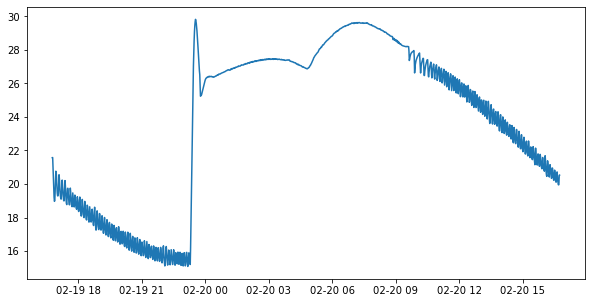

In [16]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax.plot(LES.To)
ax.plot(epw['Dry Bulb Temperature'].loc['2018-02'])

<AxesSubplot:xlabel='time'>

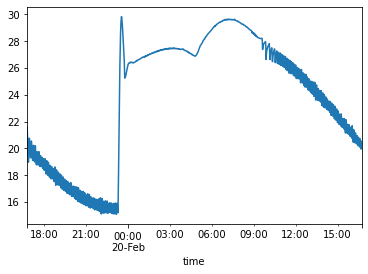

In [17]:
LES.To.plot()

<AxesSubplot:xlabel='tiempo'>

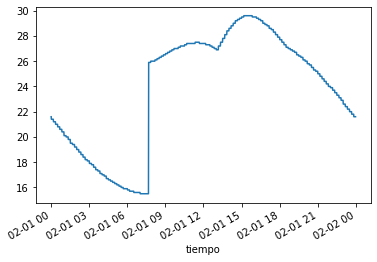

In [18]:
epw['Dry Bulb Temperature']['2019-02-01'].plot()

In [19]:
LES = LES.set_index(epw.loc['2019-02-01 01:00:00':'2019-02-02 00:58:00'].index)

<AxesSubplot:xlabel='tiempo'>

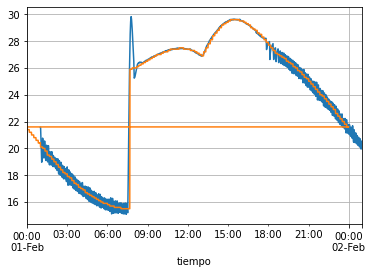

In [20]:
LES.To.plot()
epw['Dry Bulb Temperature']['2019-02-01'].plot(grid=True)


<AxesSubplot:xlabel='tiempo'>

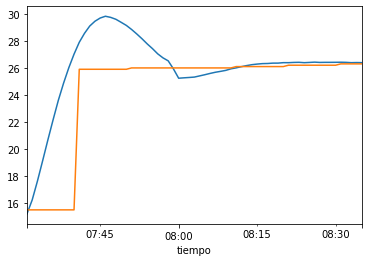

In [21]:
LES.To                     .loc['2019-02-01 07:31:00':'2019-02-01 08:35:00 '].plot()
epw['Dry Bulb Temperature'].loc['2019-02-01 07:31:00':'2019-02-01 08:35:00 '].plot()

In [22]:
epw['Dry Bulb Temperature'].loc['2019-02-01 07:31:00':'2019-02-01 08:35:00 '] = LES.To.loc['2019-02-01 07:31:00':'2019-02-01 08:35:00 ']

C:\Users\anaga\Documents\WPy64-3950\python-3.9.5.amd64\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='tiempo'>

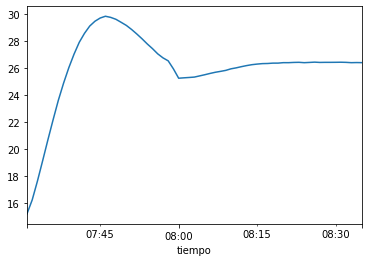

In [23]:
epw['Dry Bulb Temperature'].loc['2019-02-01 07:31:00':'2019-02-01 08:35:00 '].plot()

<AxesSubplot:xlabel='tiempo'>

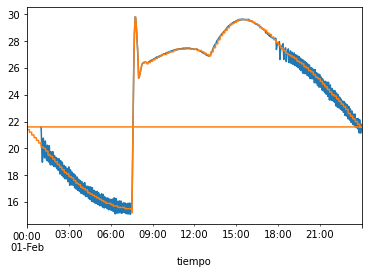

In [24]:
LES.To                     .loc['2019-02-01'].plot()
epw['Dry Bulb Temperature'].loc['2019-02-01'].plot()

<AxesSubplot:xlabel='tiempo'>

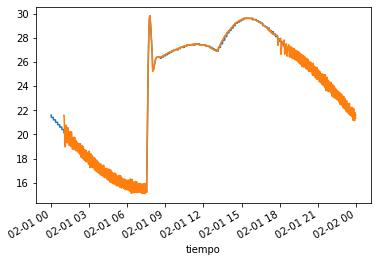

In [25]:
epw['Dry Bulb Temperature'].loc['2019-02-01'].plot()
LES.To                     .loc['2019-02-01'].plot()

In [26]:
fecha = []

for i in  range(2,29,1):
    if i < 10:
        fecha.append('2019-02-0' + str(i))
    else:
        fecha.append('2019-02-' + str(i))
    
   
    

In [27]:
valores = []
for i in LES['To'].loc['2019-02-01 07:31:00':'2019-02-01 08:35:00']:
    valores.append(i)
    



In [28]:
a = ' 07:31:00'
b = ' 08:35:00'
for i in fecha:
    epw['Dry Bulb Temperature'].loc[i + a: i + b ]  = valores

C:\Users\anaga\Documents\WPy64-3950\python-3.9.5.amd64\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='tiempo'>

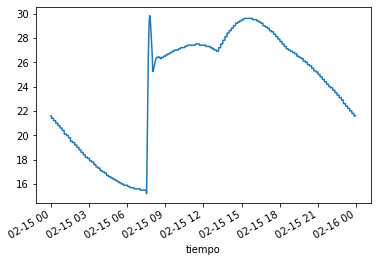

In [29]:
epw['Dry Bulb Temperature'].loc['2019-02-15'].plot()

In [30]:
epw

,Data Source and Uncertainty Flags,Dry Bulb Temperature,Dew Point Temperature,Relative Humidity,Atmospheric Station Pressure,Extraterrestrial Horizontal Radiation,Extraterrestrial Direct Normal Radiation,Horizontal Infrared Radiation Intensity,Global Horizontal Radiation,Direct Normal Radiation,...,Ceiling Height,Present Weather Observation,Present Weather Codes,Precipitable Water,Aerosol Optical Depth,Snow Depth,Days Since Last Snowfall,Albedo,Liquid Precipitation Depth,Liquid Precipitation Quantity
tiempo,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,?9?9?9?9E0?9?9?9*9*9?9*9*9?9*9*9?9?9*9*_*9*9*9...,20.4,3.0,32,86864,9999.0,9999.0,354.7685,0.0,0.0,...,999,9,999999999,0,0.0,0,88,999.0,999.0,99.0
2019-01-01 01:01:00,?9?9?9?9E0?9?9?9*9*9?9*9*9?9*9*9?9?9*9*_*9*9*9...,20.4,3.0,32,86864,9999.0,9999.0,354.7685,0.0,0.0,...,999,9,999999999,0,0.0,0,88,999.0,999.0,99.0
2019-01-01 01:02:00,?9?9?9?9E0?9?9?9*9*9?9*9*9?9*9*9?9?9*9*_*9*9*9...,20.4,3.0,32,86864,9999.0,9999.0,354.7685,0.0,0.0,...,999,9,999999999,0,0.0,0,88,999.0,999.0,99.0
2019-01-01 01:03:00,?9?9?9?9E0?9?9?9*9*9?9*9*9?9*9*9?9?9*9*_*9*9*9...,20.4,3.0,32,86864,9999.0,9999.0,354.7685,0.0,0.0,...,999,9,999999999,0,0.0,0,88,999.0,999.0,99.0
2019-01-01 01:04:00,?9?9?9?9E0?9?9?9*9*9?9*9*9?9*9*9?9?9*9*_*9*9*9...,20.4,3.0,32,86864,9999.0,9999.0,354.7685,0.0,0.0,...,999,9,999999999,0,0.0,0,88,999.0,999.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 00:55:00,?9?9?9?9E0?9?9?9*9*9?9*9*9?9*9*9?9?9*9*_*9*9*9...,20.6,3.0,31,86864,9999.0,9999.0,355.5426,0.0,0.0,...,999,9,999999999,0,0.0,0,88,999.0,999.0,99.0
2019-12-31 00:56:00,?9?9?9?9E0?9?9?9*9*9?9*9*9?9*9*9?9?9*9*_*9*9*9...,20.6,3.0,31,86864,9999.0,9999.0,355.5426,0.0,0.0,...,999,9,999999999,0,0.0,0,88,999.0,999.0,99.0
2019-12-31 00:57:00,?9?9?9?9E0?9?9?9*9*9?9*9*9?9*9*9?9?9*9*_*9*9*9...,20.6,3.0,31,86864,9999.0,9999.0,355.5426,0.0,0.0,...,999,9,999999999,0,0.0,0,88,999.0,999.0,99.0


In [32]:
def to_epw(file,df,epw_file):
    """
    Save dataframe to EPW 
    
    Arguments:
    ----------
    file -- path location of EPW file
    """
  
    
  
    names = ['Year',
               'Month',
               'Day',
               'Hour',
               'Minute',
               'Data Source and Uncertainty Flags',
               'Dry Bulb Temperature',
               'Dew Point Temperature',
               'Relative Humidity',
               'Atmospheric Station Pressure',
               'Extraterrestrial Horizontal Radiation',
               'Extraterrestrial Direct Normal Radiation',
               'Horizontal Infrared Radiation Intensity',
               'Global Horizontal Radiation',
               'Direct Normal Radiation',
               'Diffuse Horizontal Radiation',
               'Global Horizontal Illuminance',
               'Direct Normal Illuminance',
               'Diffuse Horizontal Illuminance',
               'Zenith Luminance',
               'Wind Direction',
               'Wind Speed',
               'Total Sky Cover',
               'Opaque Sky Cover',
               'Visibility',
               'Ceiling Height',
               'Present Weather Observation',
               'Present Weather Codes','Precipitable Water','Aerosol Optical Depth','Snow Depth','Days Since Last Snowfall',
               'Albedo','Liquid Precipitation Depth','Liquid Precipitation Quantity']
    
    
    rename = {'To':'Dry Bulb Temperature'        ,
              'RH':'Relative Humidity'           ,
              'P' :'Atmospheric Station Pressure',
              'Ig':'Global Horizontal Radiation' ,
              'Ib':'Direct Normal Radiation'     ,
              'Id':'Diffuse Horizontal Radiation',
              'Wd':'Wind Direction'              ,
              'Ws':'Wind Speed'                  }
    
    df2 = df.copy()
    df2.rename(columns=rename,inplace=True)
    df2['Year']    = df2.index.year
    df2['Month']   = df2.index.month
    df2['Day']     = df2.index.day
    df2['Hour']    = df2.index.hour
    df2['Minute']  = df2.index.minute
    
    df2.loc[df2.Hour==00.,['Hour']] = [24]
    
    
    
    
    with open(epw_file) as myfile:
        head = [next(myfile) for x in range(8)]
    
    epw_header = ''
    for texto in head:
        epw_header += texto
        
    df2[names].to_csv(file,header=None,index=False)
    with open(file) as f:
        epw = f.read()
    
    epw_tail = ''
    for texto in epw:
        epw_tail += texto
    epw = epw_header + epw_tail
    
    
    with open(file, 'w') as f:
        f.write(epw)



In [33]:
to_epw('../data/LES.epw',epw,'../data/Tsa_Temixco_enero_este_0.3_eps.epw')